<a href="https://colab.research.google.com/github/thulieblack/deeplearnings/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 11.2MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 1.2MB 24.4MB/s 
     |████████████████████████████████| 194kB 37.7MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 238kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [2]:
from fastai.text.all import *
import pandas as pd



In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [5]:
df = pd.read_csv('train.csv', encoding= 'unicode_escape')
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [6]:
test = pd.read_csv('test.csv', encoding= 'unicode_escape')
test.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [7]:
len(df), len(test)

(27481, 4815)

In [8]:
dls = TextDataLoaders.from_df(df, 
                              text_col="text", 
                              label_col="sentiment", valid = test)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [9]:
dls.show_batch()

,text,category
0,xxbos xxup xxunk xxup voice : xxrep 3 a xxrep 3 r xxrep 3 g xxrep 3 h xxrep 3 ! i xxunk xxup my xxrep 4 * xxup wallet xxup at xxup work xxup xxunk xxrep 3 ! xxup dammit xxrep 3 ! xxup so xxup close xxup yet xxup so xxup far xxrep 3 ! xxup now xxup i m xxup starving xxrep 3 !,negative
1,"xxbos i xxup tried xxup to xxup put a xxup iron xxup on , xxup on xxup my xxup book xxup bag xxup and i xxup burnt xxup my xxup bag xxup with xxup the xxup iron xxup lol .. xxup buzz xxup keep xxup making xxup fun xxup of xxup me … ( xxrep 4 * ) xxup lol",positive
2,"xxbos xxup mandy xxrep 3 ! xxup it xxup won`t xxup let xxup me xxup vote i xxup want xxup her xxup to xxup win xxup but i xxup can`t xxup help , i xxup am xxup gon na xxup jump xxup off a xxup bridge ( kidding ) xxup but xxup this xxup sux",neutral
3,"xxbos xxup i m xxup so xxrep 3 r xxup yy i went to the cinema with my xxunk .. cause i m cool .. and yeah i m so xxrep 4 r y xxup tomorrow xxup tho , xxup ill xxup make xxup sure xxup of xxup it",neutral
4,"xxbos xxmaj jamie @ xxmaj sean xxmaj xxunk , up for some angry xxrep 4 * ? : xxmaj jamie @ xxmaj sean xxmaj xxunk , i wouldn`t piss this one off xxmaj hey there xxmaj guys , xxmaj do .. http : / / tinyurl.com / xxunk",neutral
5,xxbos xxup like u xxup said ' give xxup tc a xxup chance ! ' xxup we xxup will xxup miss xxup thomas xxup but xxup have xxup to xxup move xxup on . xxup so xxup watch xxup this ! http : / / bit.ly / r6rfc,neutral
6,"xxbos xxmaj dad : ' no trips to xxmaj xxunk for you . ' xxmaj me : ' i do live in xxup dc & xxup nyc which also = big xxunk . ' xxmaj bummer , no xxmaj pizza xxmaj hut chicken xxunk pizza for me",negative
7,"xxbos xxmaj today is just not my day . i can`t seem to feel any better . xxmaj if i do nt eat , i m hungry . xxmaj if i do eat , i feel like i m gon na be sick . xxmaj blah",negative
8,xxbos xxup sb xxunk . xxmaj flop a q 9 . 4 xxunk check . xxmaj turn 9 . i check call 200 bet . xxmaj river brick . i check call with trip xxunk with k kick . xxmaj he shows xxup xxunk .,neutral


In [10]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.3, metrics=accuracy)

In [11]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.947544,0.911765,0.562591,00:50


epoch,train_loss,valid_loss,accuracy,time
0,0.765135,0.696987,0.704512,01:02
1,0.646601,0.622598,0.740357,01:02
2,0.535236,0.616031,0.751819,01:02
3,0.406424,0.661159,0.745269,01:02


In [12]:
learn.show_results()

,text,category,category_
0,xxbos xxup omg i xxup finished xxup my xxup history xxup xxunk xxup book xxrep 4 ! xxup just xxup need 2 xxup make xxup it xxup pretty xxup and xxup print xxup it xxup off xxup and xxup i m xxup done xxrep 3 ! xxup whoo xxrep 3 !,neutral,positive
1,xxbos xxmaj brooklyn xxrep 3 ! xxmaj we went hard xxrep 3 ! xxmaj now back up top ! ! xxmaj but 1st xxmaj xxunk … yea again http : / / tinyurl.com / xxunk http : / / ti .. http : / / tinyurl.com / xxunk,negative,neutral
2,"xxbos xxmaj uber xxmaj bored xxup atm , after xxmaj out of the xxmaj blue , will have shower , then watch house or xxunk ( vid ) then xxup csi + xxup csi xxup ny + xxmaj bones xxmaj double . .. . xxup yay !",positive,neutral
3,xxbos xxup wow xxup and xxup to xxup think xxup some xxup people xxup actually xxup really xxup do xxup live xxup in xxup the xxup jungle xxup but xxup do nt xxup get xxup to xxup go xxup back xxup to a xxup hotel .,neutral,neutral
4,"xxbos xxmaj it`s a xxmaj peter & xxmaj xxunk morning - > xxmaj and xxup i , go to pieces and i wanna hide / xxmaj go to pieces and i almost die / xxmaj ever … ? http : / / blip.fm / xxunk",neutral,negative
5,"xxbos c xxrep 3 o l. - xxmaj weekend xxunk that great , xxrep 3 e h. xxmaj xxunk xxrep 4 t ever . xxmaj friday was better than i expected it to be , so i … http : / / tumblr.com / xxunk",neutral,positive
6,"xxbos xxmaj i m feeling so xxunk . xxmaj i m sad . xxmaj but happy . i don`t now how to feel . xxmaj it`s over , but not at the same time . xxmaj it just feels over . i love you .",positive,neutral
7,"xxbos just missed to answer his xxup i m xxup again ! xxmaj for the nth time ! xxmaj this is making me sad . xxmaj whenever he xxup i m ( which is all the time ) , i am always out .",negative,negative
8,xxbos 2 pm today is xxmaj quiz xxmaj time at the xxmaj goat ! xxmaj game shows to play and prizes to be won ! xxmaj plus ` toss xxmaj off xxmaj tommy ` for free drinks ! xxmaj today from 2 ! x,positive,neutral


Predict new text from the pre-trained model


In [13]:
learn.predict("I'm sad")

('negative', tensor(0), tensor([9.9991e-01, 6.6390e-05, 2.4870e-05]))

In [14]:
learn.predict("I'm happy today ")

('positive', tensor(2), tensor([2.5160e-03, 8.9931e-04, 9.9658e-01]))

In [15]:
learn.predict("I want to sleep but i have to work argh ")

('negative', tensor(0), tensor([0.4938, 0.4758, 0.0304]))

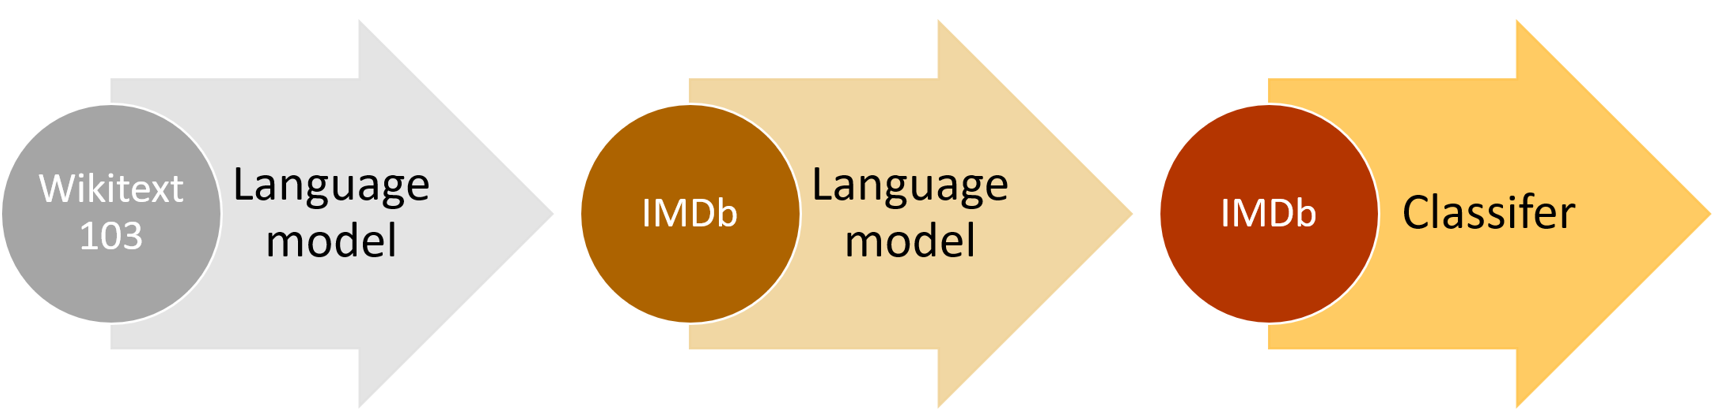

The ULMFiT approach




In [52]:
dls_lm = TextDataLoaders.from_df(df, text_col='text', is_lm=True, valid_pct=0.2)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [54]:
dls_lm.show_batch(max_n=3)

,text,text_
0,"xxbos xxmaj they do ! xxmaj xxunk xxmaj i`m guessing , right ? xxmaj oh and what camera are you using ? xxmaj that is insane quality ! xxbos i miss you t xxrep 5 o you are nt too far ! * a * xxbos just got back from xxunk . it was such a nice day today ! xxbos is feeling very sick xxbos xxmaj open office ' writer '","xxmaj they do ! xxmaj xxunk xxmaj i`m guessing , right ? xxmaj oh and what camera are you using ? xxmaj that is insane quality ! xxbos i miss you t xxrep 5 o you are nt too far ! * a * xxbos just got back from xxunk . it was such a nice day today ! xxbos is feeling very sick xxbos xxmaj open office ' writer ' is"
1,xxunk me xxbos i guess you didn`t hear the xxunk when kindle came out with no cover . xxmaj my purse + xxunk screen = xxunk to broken screen xxbos xxmaj recovering from a bad fall at lunch . xxmaj great start to the weekend . xxbos has had a nice long nap http : / / plurk.com / p / xxunk xxbos finally made it to phoenix ! i am home,me xxbos i guess you didn`t hear the xxunk when kindle came out with no cover . xxmaj my purse + xxunk screen = xxunk to broken screen xxbos xxmaj recovering from a bad fall at lunch . xxmaj great start to the weekend . xxbos has had a nice long nap http : / / plurk.com / p / xxunk xxbos finally made it to phoenix ! i am home .
2,* want to go to the concert tomorrow ! ! xxbos i am soo happy ! xxmaj but frustrated at the same time ! :] : s. xxmaj ohh noo xxrep 3 ! xxmaj britney is recording her new video for xxmaj xxunk xxrep 3 ! s xxrep 3 o xxunk xxrep 3 ! xxbos look how xxunk on this xxrep 4 * talks to me xxbos good weekend xxbos xxmaj xxunk,want to go to the concert tomorrow ! ! xxbos i am soo happy ! xxmaj but frustrated at the same time ! :] : s. xxmaj ohh noo xxrep 3 ! xxmaj britney is recording her new video for xxmaj xxunk xxrep 3 ! s xxrep 3 o xxunk xxrep 3 ! xxbos look how xxunk on this xxrep 4 * talks to me xxbos good weekend xxbos xxmaj xxunk for


In [55]:
learn = language_model_learner(dls_lm, AWD_LSTM, metrics=[accuracy, Perplexity()], wd=0.1).to_fp16()


In [56]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.987388,4.539108,0.207381,93.607292,01:19


In [57]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.603075,4.424108,0.224877,83.438347,01:31
1,4.474584,4.318374,0.236375,75.066483,01:30
2,4.349909,4.256710,0.241324,70.577370,01:31
3,4.238620,4.212287,0.246268,67.510788,01:30
4,4.131846,4.194447,0.249239,66.317017,01:30
5,4.051002,4.185997,0.250098,65.759064,01:31
6,3.975797,4.180995,0.251384,65.430893,01:30
7,3.915340,4.182296,0.250789,65.516090,01:31
8,3.888365,4.183229,0.250988,65.577255,01:30
9,3.859871,4.184433,0.251135,65.656265,01:30


In [58]:
learn.save('finetune')

Path('models/finetune.pth')

In [59]:
TEXT = "I think "
N_WORDS = 40
N_SENTENCES = 2

print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))



i think i tried to use a copy of my blog , but i do nt know what to do with it Off to bed and I`m not having a bad day Thank you for the link
i think i can call you . **** .... You know why you are crying . Mom is a huge fan of you . You are a lady . I`m not an iphone .


In [61]:
learn.save_encoder('finetuned')

Training a Text Classifier


In [62]:
dls_clas = TextDataLoaders.from_df(df, text_col="text", label_col="sentiment", valid_pct=0.2, text_vocab=dls_lm.vocab)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [64]:
dls_clas.show_batch(max_n=3)


,text,category
0,xxbos xxup xxunk xxup voice : xxrep 3 a xxrep 3 r xxrep 3 g xxrep 3 h xxrep 3 ! i xxunk xxup my xxrep 4 * xxup wallet xxup at xxup work xxup xxunk xxrep 3 ! xxup dammit xxrep 3 ! xxup so xxup close xxup yet xxup so xxup far xxrep 3 ! xxup now xxup i m xxup starving xxrep 3 !,negative
1,"xxbos xxmaj yeah xxmaj it xxmaj good xxmaj but do nt xxmaj click xxmaj the xxmaj red x xxmaj because xxmaj it xxmaj xxunk xxmaj it xxmaj down xxmaj but xxmaj other xxmaj then xxmaj that xxmaj its xxmaj good xxmaj and xxmaj when u xxunk xxmaj it , xxmaj it xxmaj goes ..",positive
2,"xxbos xxup ye xxrep 3 s , xxup flash xxup is xxup being xxrep 4 * xxup tonight ! xxmaj it … … … takes … … … … … .. time … … … .. to … … … open … … … .. a … … … xxunk … …",negative


In [65]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [67]:
learn = learn.load_encoder('finetuned')

In [68]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.834963,0.750319,0.663755,00:50


In [69]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.723881,0.624417,0.736718,00:51


In [70]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.626041,0.576928,0.762009,00:56


In [71]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.594233,0.570482,0.763646,01:02
1,0.523110,0.568695,0.763646,01:02


In [72]:
learn.show_results()

,text,category,category_
0,xxbos xxup omg i xxup finished xxup my xxup history xxup xxunk xxup book xxrep 4 ! xxup just xxup need 2 xxup make xxup it xxup pretty xxup and xxup print xxup it xxup off xxup and xxup i m xxup done xxrep 3 ! xxup whoo xxrep 3 !,neutral,negative
1,xxbos xxmaj brooklyn xxrep 3 ! xxmaj we went hard xxrep 3 ! xxmaj now back up top ! ! xxmaj but 1st xxmaj xxunk … yea again http : / / tinyurl.com / xxunk http : / / ti .. http : / / tinyurl.com / xxunk,negative,neutral
2,"xxbos xxmaj uber xxmaj bored xxup atm , after xxmaj out of the xxmaj blue , will have shower , then watch house or xxunk ( vid ) then xxup csi + xxup csi xxup ny + xxmaj bones xxmaj double . .. . xxup yay !",positive,neutral
3,xxbos xxup wow xxup and xxup to xxup think xxup some xxup people xxup actually xxup really xxup do xxup live xxup in xxup the xxup jungle xxup but xxup do nt xxup get xxup to xxup go xxup back xxup to a xxup hotel .,neutral,neutral
4,"xxbos xxmaj i m feeling so xxunk . xxmaj i m sad . xxmaj but happy . i don`t now how to feel . xxmaj it`s over , but not at the same time . xxmaj it just feels over . i love you .",positive,neutral
5,"xxbos c xxrep 3 o l. - xxmaj weekend xxunk that great , xxrep 3 e h. xxmaj xxunk xxrep 4 t ever . xxmaj friday was better than i expected it to be , so i … http : / / tumblr.com / xxunk",neutral,positive
6,"xxbos xxmaj it`s a xxmaj peter & xxmaj xxunk morning - > xxmaj and xxup i , go to pieces and i wanna hide / xxmaj go to pieces and i almost die / xxmaj ever … ? http : / / blip.fm / xxunk",neutral,neutral
7,"xxbos xxmaj it`s not my best writing , well i don`t think . xxup lol . but it`s some ! xxmaj i`d read it all if i were you ! xxmaj it`s pretty xxrep 4 * good after all ! = } . xxup lol",neutral,neutral
8,xxbos xxmaj can`t you guys do something on xxup co - op about xxmaj xxunk xxmaj xxunk ? xxmaj don`t you wanna see it on xxup xxunk / xxup xxunk ? xxmaj call xxmaj tony xxmaj xxunk ! xxmaj call xxmaj tim ! !,neutral,neutral
